In [1]:
#!pip freeze > ../requests.txt
#!pip install sklearn
#!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PATH1 = "../data/Desafio de Dados FieldPRO/Sensor_FieldPRO.csv"
PATH2 = "../data/Desafio de Dados FieldPRO/Estacao_Convencional.csv"

sensor_df = pd.read_csv(PATH1)
estacao_df = pd.read_csv(PATH2)

In [4]:
sensor_df.shape, sensor_df.columns

((1711, 7),
 Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
        'atm_pressure_main', 'num_of_resets', 'piezo_charge',
        'piezo_temperature'],
       dtype='object'))

In [5]:
estacao_df.shape, estacao_df.columns

((2256, 3), Index(['data', 'Hora (Brasília)', 'chuva'], dtype='object'))

In [6]:
sensor_df.isna().sum()
#sensor_df[sensor_df.air_humidity_100.isna()]
#sensor_df[sensor_df.num_of_resets.eq(3)]

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [7]:
sensor_df['data'] = pd.to_datetime(sensor_df['Datetime – utc'], format='mixed')

In [8]:
sensor_df['data'] = sensor_df.data.astype(str).str.split('+',expand=True)[0]

In [9]:
sensor_df.data

0       2020-09-30 23:00:00
1       2020-10-01 00:00:00
2       2020-10-01 01:00:00
3       2020-10-01 02:00:00
4       2020-10-01 03:00:00
               ...         
1706    2020-12-11 09:00:00
1707    2020-12-11 10:00:00
1708    2020-12-11 11:00:00
1709    2020-12-11 12:00:00
1710    2020-12-11 13:00:00
Name: data, Length: 1711, dtype: object

In [10]:
estacao_df#.isna().sum()
estacao_df['data'] = estacao_df.data + ' ' + estacao_df['Hora (Brasília)']

In [11]:
estacao_df

,data,Hora (Brasília),chuva
0,2020-09-01 00:00:00,00:00:00,0.0
1,2020-09-01 01:00:00,01:00:00,0.0
2,2020-09-01 02:00:00,02:00:00,0.0
3,2020-09-01 03:00:00,03:00:00,0.0
4,2020-09-01 04:00:00,04:00:00,0.0
...,...,...,...
2251,2020-12-03 19:00:00,19:00:00,0.0
2252,2020-12-03 20:00:00,20:00:00,0.0
2253,2020-12-03 21:00:00,21:00:00,0.0
2254,2020-12-03 22:00:00,22:00:00,0.0


In [12]:
dados_df = pd.merge(sensor_df,estacao_df[['data','chuva']], on='data')

In [13]:
dados_df.dropna(inplace=True)

In [14]:
dados_df.chuva.unique()

array([ 0. ,  0.2,  1.2,  2.2,  9.2,  4. ,  0.4,  1.6,  0.8,  0.6,  3. ,
        1.8,  5.6,  2.4,  2.8, 16.8,  3.6,  4.2,  3.4,  2. ,  6.8,  6.2,
        3.8,  4.6,  1. , 15.2,  8.2])

<Axes: >

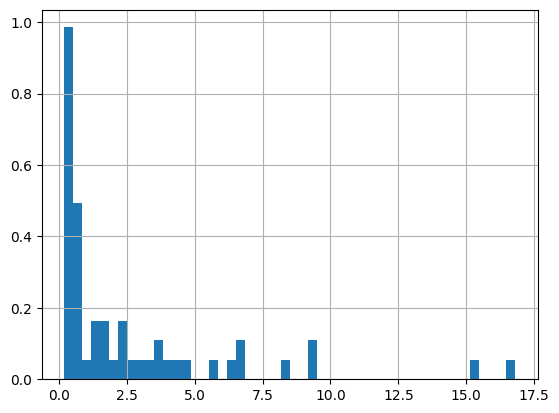

In [15]:
#dados_df.chuva.hist(density=True, bins=20)
dados_df[~dados_df.chuva.eq(0)].chuva.hist(density=True, bins=50)

<Axes: >

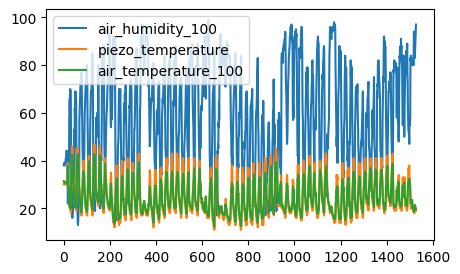

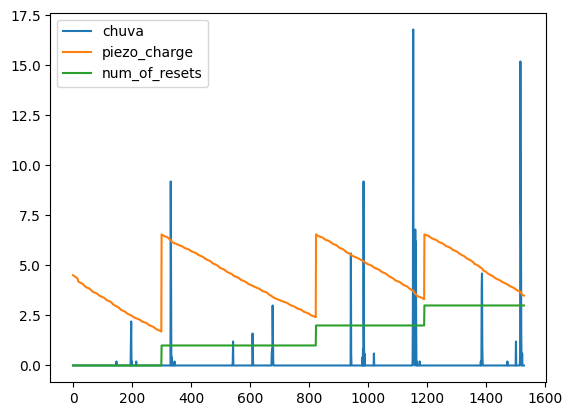

In [16]:
fig, ax = plt.subplots(figsize=(5,3))
#plt.subplot(121)
dados_df[['air_humidity_100']].plot(ax=ax)
dados_df[['piezo_temperature']].plot(ax=ax)
dados_df[['air_temperature_100']].plot(ax=ax)

#plt.subplot(122)
ax2 = dados_df[['chuva']].plot()
(dados_df[['piezo_charge']]/10000).plot(ax=ax2)
dados_df[['num_of_resets']].plot(ax=ax2)


#ax = plt.hist(sensor_df.piezo_charge)

In [17]:
dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1)#.apply(np.log)
rms = np.sqrt(dados_df.groupby('num_of_resets').dif_charge.apply(lambda x: x**2).mean())
#dados_df['dif_charge'] = dados_df.dif_charge.apply(np.log)
dados_df['dif_charge'] = dados_df.dif_charge.shift(-2)#.apply(np.log)

dados_df.dropna(inplace=True)
#dados_df['dif_charge'] = (100*dados_df['dif_charge']/dados_df['piezo_charge'])#.apply(np.log).apply(np.abs)
dados_df['dif_charge'] = (dados_df['dif_charge']-rms)/20#.apply(np.log).apply(np.abs)
#aux = dados_df[dados_df.num_of_resets.eq(1)]
#aux.piezo_charge.diff(-1)


In [18]:
dados_df.isna().sum()

Datetime – utc         0
air_humidity_100       0
air_temperature_100    0
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
data                   0
chuva                  0
dif_charge             0
dtype: int64

<Axes: >

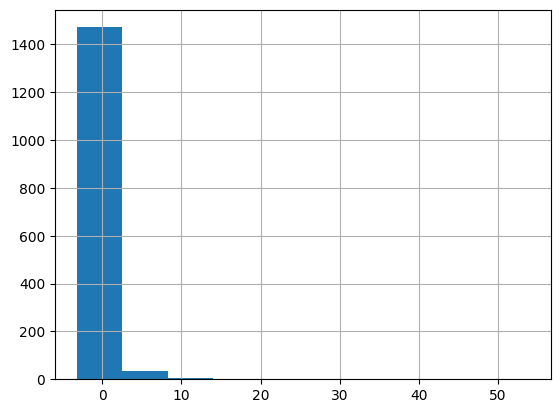

In [19]:
dados_df.dif_charge.hist()

<Axes: >

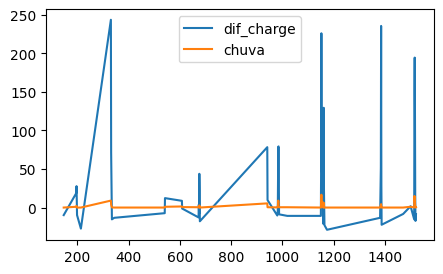

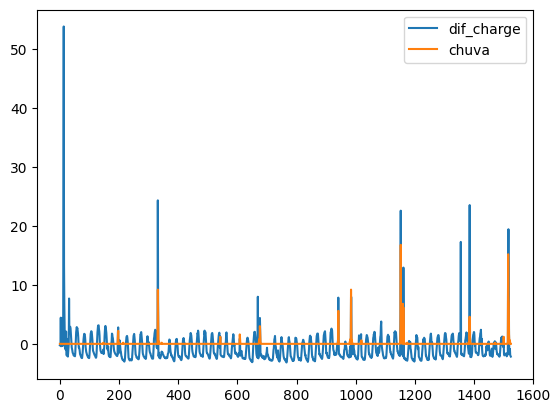

In [20]:
fig, ax = plt.subplots(figsize=(5,3))
#plt.subplot(121)
(dados_df.loc[dados_df.chuva.gt(0),['dif_charge']]*10).plot(ax=ax)
(dados_df.loc[dados_df.chuva.gt(0),['chuva']]).plot(ax=ax)

#plt.subplot(122)
ax2 = (dados_df[['dif_charge']]).plot()
(dados_df[['chuva']]).plot(ax=ax2)


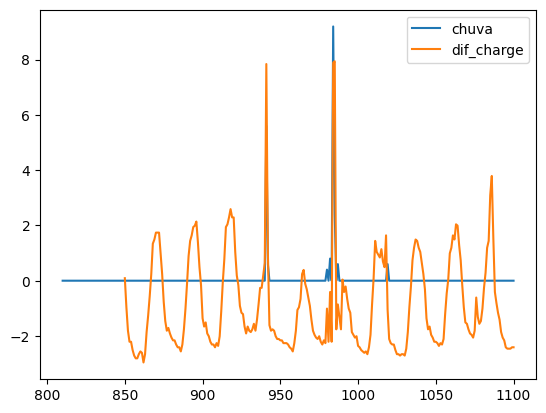

In [21]:
ax = dados_df.loc[810:1100].chuva.plot(label='chuva')
(dados_df.loc[850:1100,['dif_charge']]).plot(ax=ax)
#dados_df.loc[810:1100].plot(kind='line',x='piezo_charge', y='chuva')
plt.legend()

In [22]:
dados_df[['piezo_temperature','air_temperature_100']]
dados_df['dif_temp'] = dados_df['air_temperature_100'] - dados_df['piezo_temperature'].astype(float)

dados_df['extra'] = dados_df.dif_temp*dados_df.dif_charge

In [23]:
#dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1)
dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1 if x<=2.5 else 2 if x<=5 else 3)

In [24]:
dados_df

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva,dif_charge,dif_temp,extra,precp
0,2020-09-30T23:00:00Z,38.0,31.366,9412,0,45123,30,2020-09-30 23:00:00,0.0,-0.259424,1.366,-0.354374,0
2,2020-10-01T01:00:00Z,39.0,31.366,9419,0,44923,31,2020-10-01 01:00:00,0.0,-0.309424,0.366,-0.113249,0
3,2020-10-01T02:00:00Z,39.0,31.322,9419,0,44825,31,2020-10-01 02:00:00,0.0,4.440576,0.322,1.429865,0
4,2020-10-01T03:00:00Z,38.0,31.240,9416,0,44728,31,2020-10-01 03:00:00,0.0,-0.409424,0.240,-0.098262,0
5,2020-10-01T04:00:00Z,39.0,30.828,9411,0,44632,30,2020-10-01 04:00:00,0.0,-0.309424,0.828,-0.256203,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,2020-12-03T16:00:00Z,94.0,18.900,9440,3,35492,18,2020-12-03 16:00:00,0.0,-1.609424,0.900,-1.448482,0
1521,2020-12-03T17:00:00Z,90.0,19.700,9420,3,35355,18,2020-12-03 17:00:00,0.6,-0.859424,1.700,-1.461022,1
1522,2020-12-03T18:00:00Z,83.0,21.420,9413,3,35287,20,2020-12-03 18:00:00,0.0,-1.909424,1.420,-2.711383,0
1523,2020-12-03T19:00:00Z,86.0,20.880,9412,3,35217,20,2020-12-03 19:00:00,0.0,-2.059424,0.880,-1.812294,0


import seaborn as sns

sns.heatmap(dados_df.corr(), annot=True)

# Calibrator

In [25]:
#!pip install hyperopt

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier
from hyperopt import STATUS_OK, fmin, tpe, hp, Trials

In [27]:
dados_df.columns


Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'extra',
       'precp'],
      dtype='object')

In [28]:
cols = ['air_humidity_100',
       'atm_pressure_main',
       'piezo_temperature', 'dif_charge', 'dif_temp', 'precp']

In [29]:
#X = dados_df.loc[~dados_df.chuva.eq(0),cols].copy()
X = dados_df[cols].copy()
y = X.pop('precp')
#y = 100*y 

In [30]:
X.columns

Index(['air_humidity_100', 'atm_pressure_main', 'piezo_temperature',
       'dif_charge', 'dif_temp'],
      dtype='object')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
classifier_RF.score(X_train,y_train), classifier_RF.score(X_test,y_test)

(1.0, 0.9758241758241758)

In [34]:
#print(classification_report(y_train, classifier_RF.predict(X_train)))
print(classification_report(y_test, classifier_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       442
           1       0.50      0.11      0.18         9
           2       1.00      0.50      0.67         2
           3       1.00      0.50      0.67         2

    accuracy                           0.98       455
   macro avg       0.87      0.53      0.63       455
weighted avg       0.97      0.98      0.97       455



In [35]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [36]:
classifier_XGB.score(X_train,y_train), classifier_XGB.score(X_test,y_test)
print(classification_report(y_test, classifier_XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       442
           1       0.33      0.11      0.17         9
           2       1.00      0.50      0.67         2
           3       1.00      0.50      0.67         2

    accuracy                           0.98       455
   macro avg       0.83      0.53      0.62       455
weighted avg       0.97      0.98      0.97       455



### Bootstraping Classifier

In [37]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [38]:
N = X_bst[X_bst.precp.eq(0)].shape[0]

In [39]:
#df_aux = X_bst[~X_bst.precp.eq(0)]
for n in range(1,len(X_bst.precp.unique())):
    df_aux = X_bst[X_bst.precp.eq(n)]
    df_aux = df_aux.sample(n=N, replace=True)
    X_bst = pd.concat([X_bst,df_aux])
    

In [40]:
df_aux

,air_humidity_100,atm_pressure_main,piezo_temperature,dif_charge,dif_temp,precp
331,62.0,9420,25,24.340576,-0.54,3
331,62.0,9420,25,24.340576,-0.54,3
1517,85.0,9431,19,12.440576,0.80,3
1152,85.0,9382,20,22.590576,0.84,3
331,62.0,9420,25,24.340576,-0.54,3
...,...,...,...,...,...,...
1161,91.0,9385,20,12.940576,0.14,3
331,62.0,9420,25,24.340576,-0.54,3
1517,85.0,9431,19,12.440576,0.80,3
1159,92.0,9403,20,11.990576,0.44,3


In [41]:
X_bst

,air_humidity_100,atm_pressure_main,piezo_temperature,dif_charge,dif_temp,precp
771,58.0,9469,17,-0.359424,1.66,0
1341,59.0,9426,22,-2.109424,1.26,0
272,50.0,9477,25,1.540576,-0.39,0
1209,32.0,9434,38,0.090576,-9.22,0
1294,58.0,9462,18,-2.609424,2.50,0
...,...,...,...,...,...,...
1161,91.0,9385,20,12.940576,0.14,3
331,62.0,9420,25,24.340576,-0.54,3
1517,85.0,9431,19,12.440576,0.80,3
1159,92.0,9403,20,11.990576,0.44,3


In [42]:
y_train = X_bst.pop('precp')
X_train = X_bst

In [43]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
classifier_RF.score(X_train,y_train), classifier_RF.score(X_test,y_test)

(1.0, 0.9736263736263736)

In [45]:
#print(classification_report(y_train, classifier_RF.predict(X_train)))
print(classification_report(y_test, classifier_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       442
           1       0.25      0.11      0.15         9
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2

    accuracy                           0.97       455
   macro avg       0.81      0.65      0.70       455
weighted avg       0.97      0.97      0.97       455



## Regressor

In [46]:
dados_df.columns

Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'extra',
       'precp'],
      dtype='object')

In [47]:
cols = ['air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets',
       'piezo_temperature', 'chuva', 'dif_charge', 'dif_temp', 'extra']

In [48]:
#dados_df.loc[dados_df.chuva.gt(0),cols]

In [49]:
#X = dados_df.loc[~dados_df.chuva.eq(0),cols].copy()
X = dados_df.loc[dados_df.chuva.gt(0), cols].copy()
y = X.pop('chuva')
#y = y.apply(np.log) 

In [50]:
#plt.plot(X['air_humidity_100'], y)
#X['air_humidity_100'].plot()

In [51]:
X.columns

Index(['air_humidity_100', 'air_temperature_100', 'atm_pressure_main',
       'num_of_resets', 'piezo_temperature', 'dif_charge', 'dif_temp',
       'extra'],
      dtype='object')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [53]:
#X_train

In [54]:
calibrador_LR = LinearRegression()
calibrador_LR.fit(X_train, y_train)

LinearRegression()

In [55]:
calibrador_LR.score(X_train, y_train), calibrador_LR.score(X_test, y_test)

(0.7981688286961928, 0.6983967593824281)

In [56]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [57]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.7981440629472627, 0.6995245376449175)

In [58]:
calibrador_RFR = make_pipeline(StandardScaler(),RandomForestRegressor())
calibrador_RFR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [59]:
calibrador_RFR.score(X_train, y_train), calibrador_RFR.score(X_test, y_test)

(0.9327999178339457, 0.6315235045070412)

In [60]:
calibrador_RF = RandomForestRegressor(random_state=42)
calibrador_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador.predict(X_test))

(0.9075055442522884, 0.6439735704704657)

In [62]:
xboost = XGBRegressor()
xboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [63]:
xboost.score(X_train, y_train), xboost.score(X_test, y_test)

(0.9999999503606353, 0.48511961677736126)

In [64]:
calibrador_SVR = SVR()
calibrador_SVR.fit(X_train, y_train)

SVR()

In [65]:
calibrador_SVR.score(X_train, y_train), calibrador_SVR.score(X_test, y_test)


(-0.18082025072191743, -0.477080836067844)

In [66]:
calibrador_SGD = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))

In [67]:
#calibrador_SGD = SGDRegressor()
calibrador_SGD.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [68]:
calibrador_SGD.score(X_train, y_train), calibrador_SGD.score(X_test, y_test)

(0.7924222848378928, 0.6423380120526007)

### Hyperparameter optimization

In [69]:
seed = 42
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=mean_squared_error(y_test,pred)
    #score=-r2_score(y_test,pred)
    return score
    
def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500,rstate=np.random.default_rng(seed))
    return best

trial=Trials()
best_param=optimize(trial)


100%|██████████| 500/500 [02:25<00:00,  3.43trial/s, best loss: 3.4727454652742438]


In [70]:
for a in best_param.items():
    best_param[a[0]] = int(a[1])

best_param


{'max_depth': 19,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 177}

In [71]:
#best_param#.score(X_test,y_test), best.score(X_train,y_train)
best_RF = RandomForestRegressor(**best_param)

In [72]:
best_RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=19, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=177)

In [73]:
best_RF.score(X_train,y_train), best_RF.score(X_test,y_test)

(0.8016993421966467, 0.7424182079733321)

In [74]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)

### Bootstrap Regressor

In [ ]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [ ]:
#N = 2000

In [ ]:
X_bst = X_bst.sample(n=N, replace=True)

In [ ]:
y_train = X_bst.pop('chuva')
X_train = X_bst

In [ ]:
calibrador_RF = RandomForestRegressor(random_state=42, bootstrap=True)
calibrador_RF.fit(X_train, y_train)

In [ ]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador_RF.predict(X_test))

In [ ]:
df_aux = X_bst[~X_bst.chuva.eq(0)]
df_aux = df_aux.sample(n=N, replace=True)

In [ ]:
X_bst = pd.concat([X_bst,df_aux], ignore_index=True)

In [ ]:
y_train = X_bst.pop('chuva')
X_train = X_bst

In [ ]:
calibrador_RF = RandomForestRegressor(random_state=42)
calibrador_RF.fit(X_train, y_train)

In [ ]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador.predict(X_test))

## Stochastic Regression

In [ ]:
dados_df[dados_df.chuva.gt(0)].chuva.apply(np.sqrt).hist()
#dados_df.hist()